### Kaggle Competition - Chest X-Ray Images (Pneumonia)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
import tensorflow as tf
from keras import metrics
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import AUC
from sklearn.metrics import classification_report, confusion_matrix

#### Getting the paths of the training and test data

In [2]:
project_path = "/Users/erickthompson/Desktop/ML/Kaggle/chest_xray"
train_path = project_path + "/chest_xray/train/"
val_path = project_path + "/chest_xray/val/"
test_path = project_path + "/chest_xray/test/"

#### Hyperparameters

In [3]:
hyper_dimension = 64
hyper_batch_size = 128
hyper_epochs = 100
hyper_channels = 1
hyper_mode = 'grayscale'

#### Scalling the input images

In [4]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0, 
                                   shear_range = 0.2,
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale=1.0/255.0) 
test_datagen = ImageDataGenerator(rescale=1.0/255.0) 

#### Feeding the data from the directory

In [5]:
train_generator = train_datagen.flow_from_directory(directory = train_path, 
                                                    target_size = (hyper_dimension, hyper_dimension),
                                                    batch_size = hyper_batch_size, 
                                                    color_mode = hyper_mode,
                                                    class_mode = 'binary', 
                                                    seed = 42)
val_generator = val_datagen.flow_from_directory(directory = val_path, 
                                                 target_size = (hyper_dimension, hyper_dimension),
                                                 batch_size = hyper_batch_size, 
                                                 class_mode = 'binary',
                                                 color_mode = hyper_mode,
                                                 shuffle=False,
                                                 seed = 42)
test_generator = test_datagen.flow_from_directory(directory = test_path, 
                                                 target_size = (hyper_dimension, hyper_dimension),
                                                 batch_size = hyper_batch_size, 
                                                 class_mode = 'binary',
                                                 color_mode = hyper_mode,
                                                 shuffle=False,
                                                 seed = 42)

test_generator.reset()

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


#### CNN Model - This has 3 layers

In [9]:
cnn = Sequential()
cnn.add(InputLayer(input_shape=(hyper_dimension, hyper_dimension, hyper_channels)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Flatten())

cnn.add(Dense(activation='relu', units=128))
cnn.add(Dense(activation='sigmoid', units=1))

cnn.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=[AUC()])
cnn_model = cnn.fit(train_generator, 
                              steps_per_epoch = len(train_generator), 
                              epochs = 10, 
                              validation_data = val_generator,
                              validation_steps = len(val_generator), 
                              verbose=1)

Epoch 1/10
41/41 [==============================] - 54s 1s/step - loss: 0.5785 - auc: 0.5311 - val_loss: 0.7540 - val_auc: 0.6016
Epoch 2/10
41/41 [==============================] - 53s 1s/step - loss: 0.4259 - auc: 0.8508 - val_loss: 0.9277 - val_auc: 0.8359
Epoch 3/10
41/41 [==============================] - 53s 1s/step - loss: 0.2669 - auc: 0.9417 - val_loss: 0.7822 - val_auc: 0.8594
Epoch 4/10
41/41 [==============================] - 53s 1s/step - loss: 0.2564 - auc: 0.9462 - val_loss: 0.5609 - val_auc: 0.8750
Epoch 5/10
41/41 [==============================] - 53s 1s/step - loss: 0.2124 - auc: 0.9641 - val_loss: 0.5594 - val_auc: 0.8750
Epoch 6/10
41/41 [==============================] - 52s 1s/step - loss: 0.2105 - auc: 0.9641 - val_loss: 0.5323 - val_auc: 0.8906
Epoch 7/10
41/41 [==============================] - 51s 1s/step - loss: 0.1904 - auc: 0.9705 - val_loss: 0.5885 - val_auc: 0.9062
Epoch 8/10
41/41 [==============================] - 52s 1s/step - loss: 0.1890 - auc: 0.97

#### let's run for 10 more epochs

In [10]:
cnn_model = cnn.fit(train_generator, 
                              steps_per_epoch = len(train_generator), 
                              epochs = 10, 
                              validation_data = val_generator,
                              validation_steps = len(val_generator), 
                              verbose=1)

Epoch 1/10
41/41 [==============================] - 53s 1s/step - loss: 0.1581 - auc: 0.9796 - val_loss: 0.6733 - val_auc: 0.9062
Epoch 2/10
41/41 [==============================] - 52s 1s/step - loss: 0.1520 - auc: 0.9802 - val_loss: 0.4584 - val_auc: 0.8906
Epoch 3/10
41/41 [==============================] - 51s 1s/step - loss: 0.1580 - auc: 0.9792 - val_loss: 0.6926 - val_auc: 0.8906
Epoch 4/10
41/41 [==============================] - 52s 1s/step - loss: 0.1507 - auc: 0.9812 - val_loss: 1.0440 - val_auc: 0.8828
Epoch 5/10
41/41 [==============================] - 53s 1s/step - loss: 0.1554 - auc: 0.9797 - val_loss: 0.6620 - val_auc: 0.9062
Epoch 6/10
41/41 [==============================] - 51s 1s/step - loss: 0.1419 - auc: 0.9832 - val_loss: 0.8767 - val_auc: 0.9219
Epoch 7/10
41/41 [==============================] - 51s 1s/step - loss: 0.1582 - auc: 0.9794 - val_loss: 0.4923 - val_auc: 0.9062
Epoch 8/10
41/41 [==============================] - 51s 1s/step - loss: 0.1411 - auc: 0.98

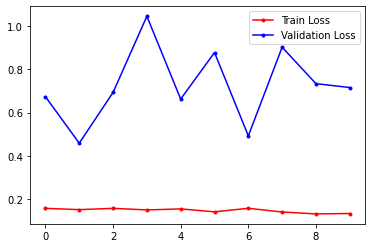

In [11]:
fig, ax = plt.subplots()
ax.plot(cnn_model.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(cnn_model.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

#### Conclusion: 

No more training is needed. The training loss seems to have hit a pleatau so this model will not perform better with more training. 